## Exploring The Telenor Telco Dataset

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import pickle
from datetime import datetime
from sklearn.metrics import f1_score, precision_score, recall_score
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode
import plotly.graph_objs as go
import seaborn as sns
import cufflinks as cf
import glob
import sys
import json
from tqdm.notebook import tqdm
cf.go_offline()
init_notebook_mode;



### Loading the data

In [154]:
data_path = '../../Data/Data_DK/radio_kpis_sample.csv'
data_path = '../../Hackathon2021_Telenor/hackathon_kpis_anonymised.csv'
df = pd.read_csv(data_path)


### Some info
From below we see that we have 1042688 rows of data. 
From df.describe() we also see that most columns have missing values, and that all data is between 0 and 1. 

In [155]:
print(df.shape)
df.head()

(1042688, 16)


,cell_name,timestamp,ho_failure_rate,num_voice_attempts,voice_drop_rate,num_data_attempts,voice_setup_failure_rate,voice_tot_failure_rate,avail_period_duration,bandwidth,throughput_rate,data_setup_failure_rate,data_drop_rate,data_tot_failure_rate,unavail_total_rate,unavail_unplan_rate
0,00_11Z,2020-04-09 15:00:00+00:00,0.333333,0.000927,0.0,0.004527,0.0,0.0,1.0,0.49975,0.000195,0.000000,0.000731,0.000731,0.333364,0.0
1,00_11Z,2020-04-22 14:00:00+00:00,0.360000,0.017609,0.0,0.012312,0.0,0.0,1.0,0.49975,0.000197,0.001075,0.000269,0.000403,0.333364,0.0
2,00_11Z,2020-05-08 21:00:00+00:00,0.333333,0.002780,0.0,0.008115,0.0,0.0,1.0,0.49975,0.000196,0.000000,0.000000,0.000000,0.333364,0.0
3,00_11Z,2020-05-10 13:00:00+00:00,0.380952,0.012048,0.0,0.004898,0.0,0.0,1.0,0.49975,0.000116,0.000000,0.002027,0.002027,0.333364,0.0
4,00_11Z,2020-05-12 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.49975,NaN,NaN,NaN,NaN,0.666728,0.0


In [156]:
df.describe()

,ho_failure_rate,num_voice_attempts,voice_drop_rate,num_data_attempts,voice_setup_failure_rate,voice_tot_failure_rate,avail_period_duration,bandwidth,throughput_rate,data_setup_failure_rate,data_drop_rate,data_tot_failure_rate,unavail_total_rate,unavail_unplan_rate
count,469309.000000,912315.000000,630066.000000,912210.000000,630066.000000,630066.000000,1.042688e+06,1.042688e+06,811369.000000,895247.000000,895247.000000,895247.000000,1.042688e+06,1.031935e+06
mean,0.340013,0.012314,0.000720,0.020732,0.000980,0.001046,9.990099e-01,3.435080e-01,0.000180,0.002646,0.000333,0.000664,3.579869e-01,1.435138e-05
std,0.042657,0.027938,0.010291,0.037992,0.018921,0.012102,2.345380e-02,3.452026e-01,0.001994,0.019858,0.002291,0.003553,8.600321e-02,1.056791e-03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.333333,0.000000,0.000000,0.002528,0.000000,0.000000,1.000000e+00,9.954977e-02,0.000014,0.000000,0.000000,0.000000,3.333642e-01,0.000000e+00
50%,0.333333,0.002780,0.000000,0.007744,0.000000,0.000000,1.000000e+00,9.954977e-02,0.000099,0.000000,0.000000,0.000067,3.333642e-01,0.000000e+00
75%,0.333333,0.011121,0.000000,0.022664,0.000000,0.000000,1.000000e+00,4.997499e-01,0.000248,0.001343,0.000226,0.000576,3.333642e-01,0.000000e+00
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00


### Print number of nans for each column

In [201]:
nan_values = df.isna().sum()
print(nan_values)
nan_columns = nan_values[nan_values > 0].index.tolist()
nan_columns

cell_name                        0
timestamp                        0
ho_failure_rate             573379
num_voice_attempts          130373
voice_drop_rate             412622
num_data_attempts           130478
voice_setup_failure_rate    412622
voice_tot_failure_rate      412622
avail_period_duration            0
bandwidth                        0
throughput_rate             231319
data_setup_failure_rate     147441
data_drop_rate              147441
data_tot_failure_rate       147441
unavail_total_rate               0
unavail_unplan_rate          10753
dtype: int64


['ho_failure_rate',
 'num_voice_attempts',
 'voice_drop_rate',
 'num_data_attempts',
 'voice_setup_failure_rate',
 'voice_tot_failure_rate',
 'throughput_rate',
 'data_setup_failure_rate',
 'data_drop_rate',
 'data_tot_failure_rate',
 'unavail_unplan_rate']

### Sorting data after timestamp

In [157]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by=['timestamp'])
df.head()

,cell_name,timestamp,ho_failure_rate,num_voice_attempts,voice_drop_rate,num_data_attempts,voice_setup_failure_rate,voice_tot_failure_rate,avail_period_duration,bandwidth,throughput_rate,data_setup_failure_rate,data_drop_rate,data_tot_failure_rate,unavail_total_rate,unavail_unplan_rate
519830,22_21Q,2019-11-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.09955,NaN,NaN,NaN,NaN,0.333364,0.0
486561,02_31Q,2019-11-04 00:00:00+00:00,NaN,0.000000,NaN,0.000781,NaN,NaN,1.0,0.09955,2.322707e-08,0.0,0.002119,0.002119,0.333364,0.0
850004,25_11W,2019-11-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.00000,NaN,NaN,NaN,NaN,0.666728,0.0
116626,28_11Y,2019-11-04 00:00:00+00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,1.0,0.00000,NaN,NaN,NaN,NaN,0.666728,NaN
144594,12_21W,2019-11-04 00:00:00+00:00,NaN,0.013902,0.0,0.091727,0.0,0.0,1.0,1.00000,5.298183e-04,0.0,0.000090,0.000090,0.333364,0.0


### Checking the resolution 
From below we see that it is hourly, and only once is there a gap of more than an hour (2020-03-29).

In [158]:
grouped_df = df.groupby(['timestamp'])

for timestamp, group in grouped_df:
    t = timestamp
    break

for timestamp, group in grouped_df:
    next_t = timestamp
    td = next_t - t
    td_mins = int(td.total_seconds() / 60)
    if td_mins != 60:
        print(f'Time between {t} and {timestamp} is not 1 hour')
    t = next_t


Time between 2019-11-04 00:00:00+00:00 and 2019-11-04 00:00:00+00:00 is not 1 hour
Time between 2020-03-29 01:00:00+00:00 and 2020-03-29 04:00:00+00:00 is not 1 hour


### Checking number of cells that has data present for each timestamp

We see that the number of cells present varies a lot and flunctuates around ~100.

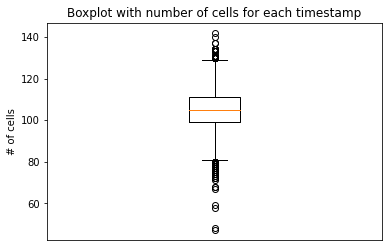

In [159]:
timestamps = []
num_cells_at_time = []
for timestamp, group in grouped_df:
    timestamps.append(timestamp)
    num_cells_at_time.append(len(group))

num_cell_df = pd.DataFrame({'timestamp': timestamps, 'num_cells': num_cells_at_time})
fig = px.line(num_cell_df, x="timestamp", y='num_cells', hover_data={"timestamp": "|%B %d. %H:%M, %Y"}, title='Number of cells for each timestamp')
fig.show()


plt.boxplot(num_cells_at_time);
plt.title('Boxplot with number of cells for each timestamp')
plt.ylabel('# of cells')
plt.xticks([], [])
plt.show()

## Aggregating cells within same sector

The cell_name is of the form 'XX_ija', where:

- XX in {00,01,02,..,30} denotes the site the cell belongs to;
- i in {1,2,3} denotes the sector the cell belongs to;
- j in {1,2,...} denotes the carrier;
- a in {'Z','X','Y','W','V','R','Q','P'} denotes the technology and frequency of the cell based on the table below.

In [202]:
df2 = df.copy()
df2['site'] = df2['cell_name'].apply(lambda s: int(s.split('_')[0]))
df2['sector'] = df2['cell_name'].apply(lambda s: int(s.split('_')[1][0]))
df2['carrier'] = df2['cell_name'].apply(lambda s: int(s.split('_')[1][1]))
df2['tech'] = df2['cell_name'].apply(lambda s: s.split('_')[1][2])
df2.head()

,cell_name,timestamp,ho_failure_rate,num_voice_attempts,voice_drop_rate,num_data_attempts,voice_setup_failure_rate,voice_tot_failure_rate,avail_period_duration,bandwidth,throughput_rate,data_setup_failure_rate,data_drop_rate,data_tot_failure_rate,unavail_total_rate,unavail_unplan_rate,site,sector,carrier,tech
519830,22_21Q,2019-11-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.09955,NaN,NaN,NaN,NaN,0.333364,0.0,22,2,1,Q
486561,02_31Q,2019-11-04 00:00:00+00:00,NaN,0.000000,NaN,0.000781,NaN,NaN,1.0,0.09955,2.322707e-08,0.0,0.002119,0.002119,0.333364,0.0,2,3,1,Q
850004,25_11W,2019-11-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.00000,NaN,NaN,NaN,NaN,0.666728,0.0,25,1,1,W
116626,28_11Y,2019-11-04 00:00:00+00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,1.0,0.00000,NaN,NaN,NaN,NaN,0.666728,NaN,28,1,1,Y
144594,12_21W,2019-11-04 00:00:00+00:00,NaN,0.013902,0.0,0.091727,0.0,0.0,1.0,1.00000,5.298183e-04,0.0,0.000090,0.000090,0.333364,0.0,12,2,1,W


### Fill NaN using mean or median of column within same sector

In [214]:
agg_df = df2.copy()
for c in nan_columns:
    agg_df[c] = agg_df[c].fillna(agg_df.groupby(['timestamp', 'site', 'sector'])[c].transform('median'))
    agg_df[c] = agg_df[c].fillna(agg_df.groupby(['timestamp', 'site'])[c].transform('median'))
    agg_df[c] = agg_df[c].fillna(agg_df.groupby(['site', 'sector'])[c].transform('median'))
    agg_df[c] = agg_df[c].fillna(agg_df.groupby(['site'])[c].transform('median'))
    agg_df[c] = agg_df[c].fillna(agg_df[c].median())
    
print(agg_df.isna().sum())
agg_df.head()

cell_name                   0
timestamp                   0
ho_failure_rate             0
num_voice_attempts          0
voice_drop_rate             0
num_data_attempts           0
voice_setup_failure_rate    0
voice_tot_failure_rate      0
avail_period_duration       0
bandwidth                   0
throughput_rate             0
data_setup_failure_rate     0
data_drop_rate              0
data_tot_failure_rate       0
unavail_total_rate          0
unavail_unplan_rate         0
site                        0
sector                      0
carrier                     0
tech                        0
dtype: int64


,cell_name,timestamp,ho_failure_rate,num_voice_attempts,voice_drop_rate,num_data_attempts,voice_setup_failure_rate,voice_tot_failure_rate,avail_period_duration,bandwidth,throughput_rate,data_setup_failure_rate,data_drop_rate,data_tot_failure_rate,unavail_total_rate,unavail_unplan_rate,site,sector,carrier,tech
519830,22_21Q,2019-11-04 00:00:00+00:00,0.333333,0.000000,0.0,0.002092,0.0,0.0,1.0,0.09955,2.703543e-04,0.0,0.000000,0.000000,0.333364,0.0,22,2,1,Q
486561,02_31Q,2019-11-04 00:00:00+00:00,0.333333,0.000000,0.0,0.000781,0.0,0.0,1.0,0.09955,2.322707e-08,0.0,0.002119,0.002119,0.333364,0.0,2,3,1,Q
850004,25_11W,2019-11-04 00:00:00+00:00,0.333333,0.000463,0.0,0.003905,0.0,0.0,1.0,1.00000,1.017473e-04,0.0,0.000000,0.000000,0.666728,0.0,25,1,1,W
116626,28_11Y,2019-11-04 00:00:00+00:00,0.333333,0.000000,0.0,0.000000,0.0,0.0,1.0,0.00000,1.010678e-04,0.0,0.000000,0.000049,0.666728,0.0,28,1,1,Y
144594,12_21W,2019-11-04 00:00:00+00:00,0.333333,0.013902,0.0,0.091727,0.0,0.0,1.0,1.00000,5.298183e-04,0.0,0.000090,0.000090,0.333364,0.0,12,2,1,W


### Now aggregate across each sector

In [215]:
agg_df = agg_df.groupby(['timestamp', 'site', 'sector']).agg('sum').reset_index()
agg_df.head()

,timestamp,site,sector,ho_failure_rate,num_voice_attempts,voice_drop_rate,num_data_attempts,voice_setup_failure_rate,voice_tot_failure_rate,avail_period_duration,bandwidth,throughput_rate,data_setup_failure_rate,data_drop_rate,data_tot_failure_rate,unavail_total_rate,unavail_unplan_rate,carrier
0,2019-11-04 00:00:00+00:00,0,2,1.000000,0.038925,0.0,0.288526,0.0,0.0,3.0,0.199100,5.922941e-07,0.001588,0.000504,0.000702,1.000093,0.0,4
1,2019-11-04 00:00:00+00:00,0,3,1.000000,0.005561,0.0,0.066482,0.0,0.0,3.0,0.298649,9.412815e-08,0.003584,0.000224,0.000672,1.000093,0.0,4
2,2019-11-04 00:00:00+00:00,1,1,0.666667,0.001854,0.0,0.068468,0.0,0.0,2.0,2.000000,7.049330e-04,0.000536,0.000041,0.000122,1.333457,0.0,3
3,2019-11-04 00:00:00+00:00,1,2,1.333333,0.018536,0.0,0.120626,0.0,0.0,4.0,1.999500,1.409866e-03,0.000268,0.000164,0.000197,1.666821,0.0,5
4,2019-11-04 00:00:00+00:00,1,3,1.000000,0.000000,0.0,0.124108,0.0,0.0,3.0,0.698849,8.014958e-04,0.018134,0.000030,0.002297,1.000093,0.0,4


### Visualizing the number of cells in each sector, for each site

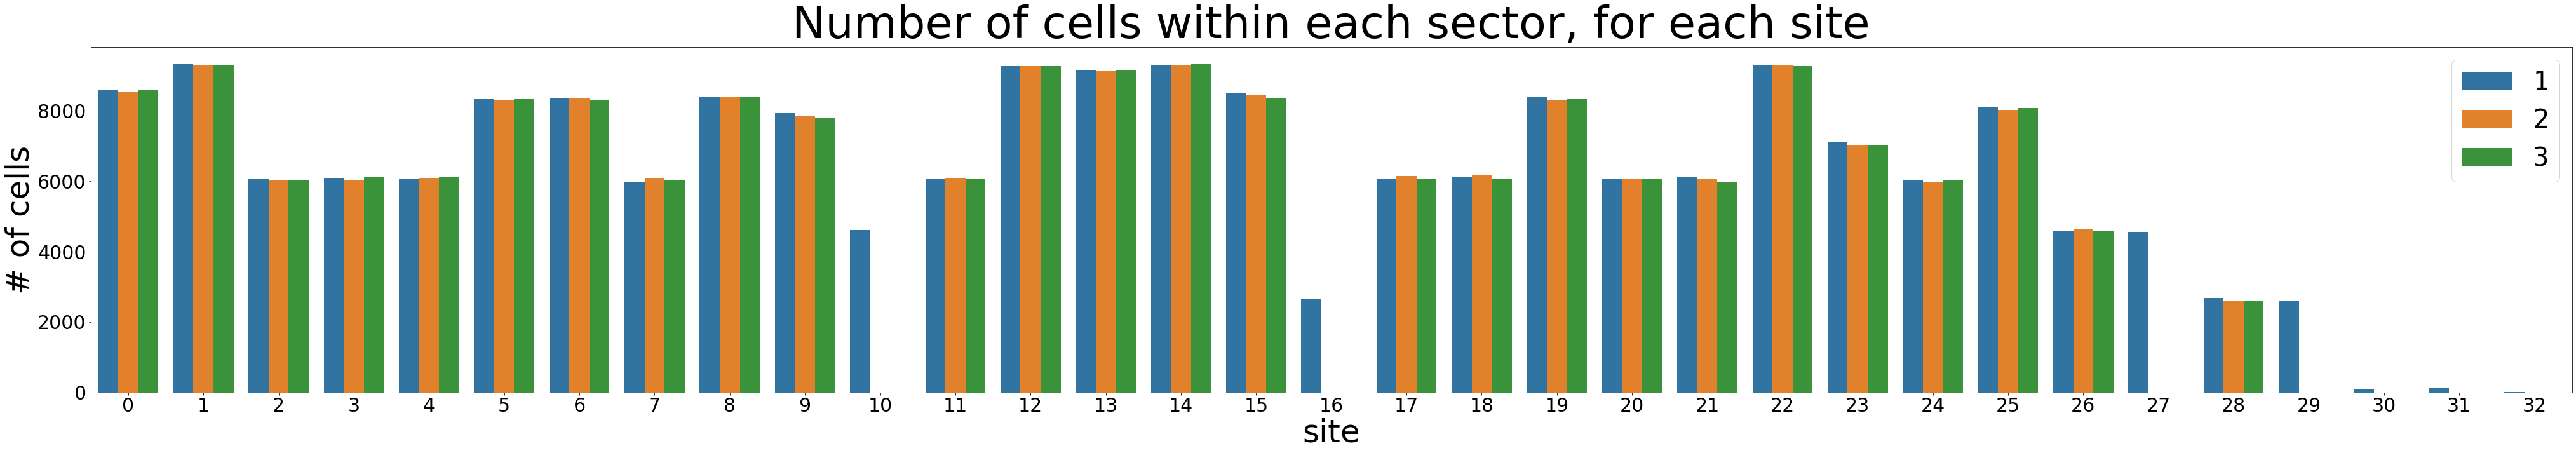

In [277]:
plt.figure(figsize=(70, 10))
ax = sns.countplot(x="site", hue="sector", data=agg_df)
plt.legend(loc='upper right', fontsize=40)
ax.set_ylabel('# of cells', fontsize=50)
ax.xaxis.label.set_size(50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('Number of cells within each sector, for each site', fontsize=70)
plt.show()

### Visualizing data for one of the sectors

In [284]:
sector_df = agg_df[(agg_df['site'] == 1) & (agg_df['sector'] == 1)]
print(sector_df.shape)
sector_df.head()

(9327, 18)


,timestamp,site,sector,ho_failure_rate,num_voice_attempts,voice_drop_rate,num_data_attempts,voice_setup_failure_rate,voice_tot_failure_rate,avail_period_duration,bandwidth,throughput_rate,data_setup_failure_rate,data_drop_rate,data_tot_failure_rate,unavail_total_rate,unavail_unplan_rate,carrier
2,2019-11-04 00:00:00+00:00,1,1,0.666667,0.001854,0.0,0.068468,0.0,0.0,2.0,2.000000,0.000705,0.000536,0.000041,0.000122,1.333457,0.0,3
60,2019-11-04 01:00:00+00:00,1,1,0.333333,0.000000,0.0,0.000361,0.0,0.0,1.0,0.099550,0.000089,0.000000,0.000000,0.000000,0.333364,0.0,2
113,2019-11-04 02:00:00+00:00,1,1,1.666667,0.000000,0.0,0.120918,0.0,0.0,5.0,1.048024,0.000589,0.000000,0.000000,0.000000,1.666821,0.0,6
169,2019-11-04 03:00:00+00:00,1,1,0.333333,0.000000,0.0,0.004792,0.0,0.0,1.0,0.249625,0.000079,0.000000,0.000000,0.000000,0.333364,0.0,1
231,2019-11-04 04:00:00+00:00,1,1,0.666667,0.000000,0.0,0.030686,0.0,0.0,2.0,0.599300,0.000295,0.000000,0.000000,0.000000,0.666728,0.0,3


In [285]:
column = 'num_voice_attempts'
fig = px.line(sector_df, x="timestamp", y=column)
fig.show()

In [286]:
sector_df_processed = sector_df.copy().drop(columns=['timestamp', 'site', 'sector', 'carrier'])

In [287]:
np.sector_df_processed.values

,ho_failure_rate,num_voice_attempts,voice_drop_rate,num_data_attempts,voice_setup_failure_rate,voice_tot_failure_rate,avail_period_duration,bandwidth,throughput_rate,data_setup_failure_rate,data_drop_rate,data_tot_failure_rate,unavail_total_rate,unavail_unplan_rate
count,9327.000000,9327.000000,9327.000000,9327.000000,9327.000000,9327.000000,9327.000000,9327.000000,9.327000e+03,9327.000000,9327.000000,9327.000000,9327.000000,9327.000000
mean,0.870394,0.047863,0.002184,0.084456,0.001494,0.002684,2.557665,0.979927,4.278255e-04,0.007143,0.001196,0.002096,0.929824,0.000039
std,0.425635,0.074093,0.022612,0.087442,0.022085,0.023822,1.229988,0.695995,3.787603e-04,0.012916,0.002320,0.003060,0.477301,0.000533
min,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.067797,0.000000,3.240001e-10,0.000000,0.000000,0.000000,0.333364,0.000000
25%,0.666667,0.003707,0.000000,0.022909,0.000000,0.000000,2.000000,0.398699,1.471055e-04,0.000000,0.000118,0.000328,0.666728,0.000000
50%,0.692810,0.018536,0.000000,0.056554,0.000000,0.000000,2.000000,1.000000,3.409736e-04,0.003096,0.000591,0.001230,1.000093,0.000000
75%,1.024491,0.059314,0.000000,0.116582,0.000000,0.000000,3.000000,1.499750,5.981480e-04,0.009510,0.001674,0.002885,1.333457,0.000000
max,4.000000,0.943466,1.333333,0.782616,1.000000,1.333333,8.000000,3.398199,3.332380e-03,0.292683,0.125000,0.125000,3.000463,0.022365


###  Save data for each sector as separate numpy files

In [312]:
def get_sector_data(df, site, sector, test_split=0.3):
    data = df.copy()
    sector_data = data[(data['site'] == site) & (data['sector'] == sector)]
    sector_data = sector_data.sort_values(by=['timestamp'])
    sector_data_processed = sector_data.drop(columns=['timestamp', 'site', 'sector', 'carrier'])
    train_idx_stop = int(sector_data_processed.shape[0] * (1-test_split))
    train = sector_data_processed.iloc[:train_idx_stop, :]
    test = sector_data_processed.iloc[train_idx_stop:, :]
    return train, test

In [313]:
train_folder = '../datasets/telenor/train'
test_folder = '../datasets/telenor/test'
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

site_sector_combinations = agg_df[['site', 'sector']].value_counts().index.tolist()
for site, sector in site_sector_combinations:
    train, test = get_sector_data(agg_df, site, sector, test_split=0.3)
    np.save(f'{train_folder}/{site}-{sector}.npy', train)
    np.save(f'{test_folder}/{site}-{sector}.npy', test)
